# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1: Amit 7359
# student 2: Omer 9600

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd

# load the data
train_data = pd.read_csv('wine_train.csv')
test_data = pd.read_csv('wine_test.csv')

# display the first 5 rows
print("Train Dataset - First 5 Rows:")
print(train_data.head())

print("\nTest Dataset - First 5 Rows:")
print(test_data.head())

Train Dataset - First 5 Rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines 

In [3]:
# Displaying general statistics for the train dataset
print("Train Dataset - Descriptive Statistics:")
print(train_data.describe())

# Displaying general statistics for the test dataset
print("\nTest Dataset - Descriptive Statistics:")
print(test_data.describe())

Train Dataset - Descriptive Statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  142.000000  142.000000  142.000000         142.000000  142.000000   
mean    12.997254    2.297746    2.361690          19.419718   99.943662   
std      0.789931    1.093317    0.283231           3.354815   13.683751   
min     11.410000    0.740000    1.360000          10.600000   78.000000   
25%     12.370000    1.592500    2.222500          17.250000   88.000000   
50%     13.050000    1.865000    2.360000          19.250000   98.000000   
75%     13.637500    3.020000    2.557500          21.375000  108.000000   
max     14.750000    5.650000    3.230000          30.000000  151.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     142.000000  142.000000            142.000000       142.000000   
mean        2.315986    2.063592              0.346690         1.561901   
std         0.639469    1.005302              0.11

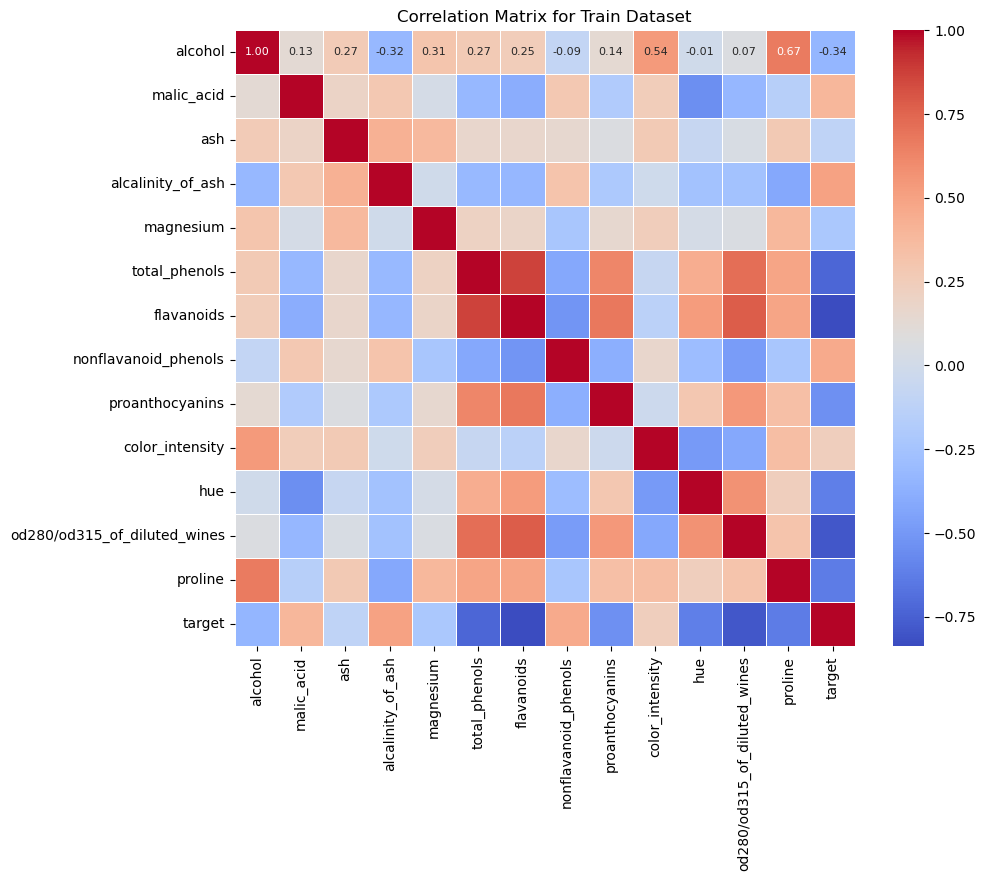

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()

# Heatmap presentation of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix for Train Dataset')
plt.show()

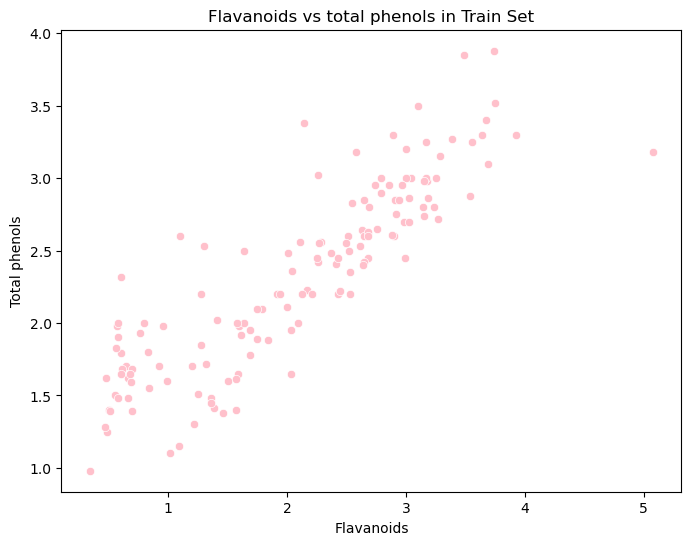

In [9]:
#Scattered graph between flavanoids and total_phenols
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data['flavanoids'], y=train_data['total_phenols'], color='pink')
plt.title('Flavanoids vs total phenols in Train Set')
plt.xlabel('Flavanoids')
plt.ylabel('Total phenols')
plt.show()

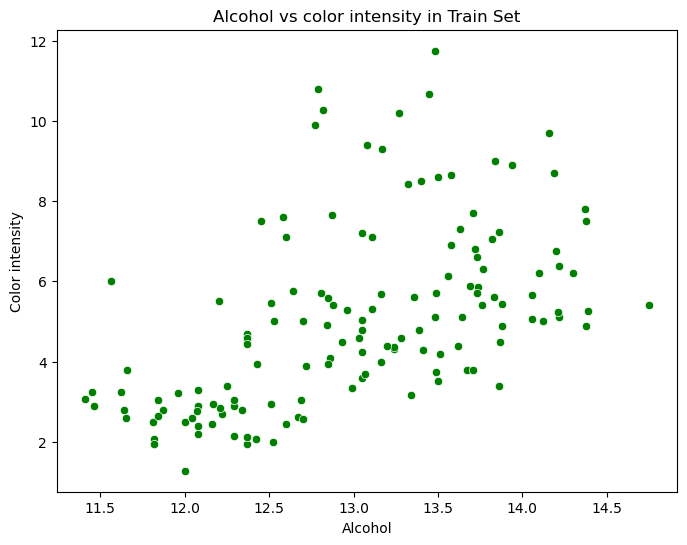

In [11]:
#Scattered graph between alcohol and color_intensity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data['alcohol'], y=train_data['color_intensity'], color='green')
plt.title('Alcohol vs color intensity in Train Set')
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.show()

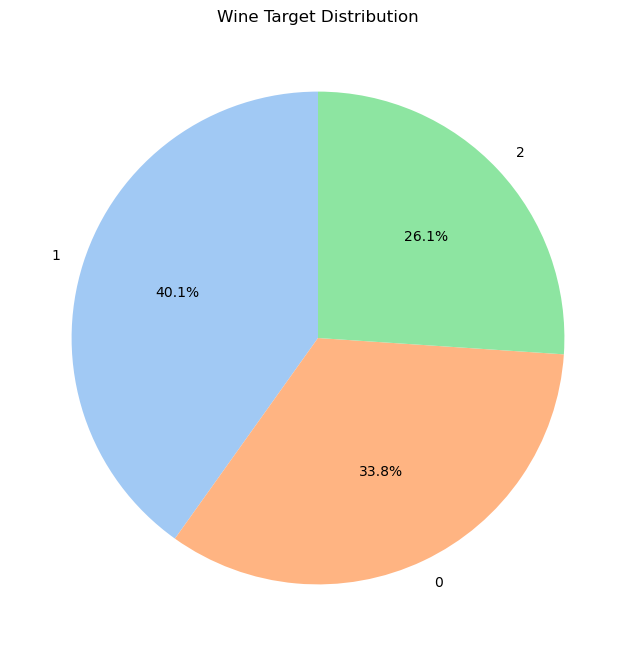

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('wine_train.csv')
target_counts = train_data['target'].value_counts()

# יצירת תרשים עוגה
plt.figure(figsize=(8, 8))
plt.pie(target_counts, 
        labels=target_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'))

plt.title('Wine Target Distribution')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Removing the 'flavanoids' column from the data set
train_data = train_data.drop(columns=['flavanoids'])

X = train_data.drop('target', axis=1)
y = train_data['target']

# separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with RandomForestClassifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('model', RandomForestClassifier())
])

# Grid Search for RandomForestClassifier
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20]
}

# GridSearchCV will perform a search on various parameters using 5-Fold Cross-Validation.
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1_macro') # Using F1-Macro Average
grid_search_rf.fit(X_train, y_train)

# Pipeline with DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('model', DecisionTreeClassifier())
])

# Grid Search for DecisionTreeClassifier
param_grid_dt = {
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 10, 20]
}

# GridSearchCV will perform a search on various parameters using 5-Fold Cross-Validation.
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1_macro') # Using F1-Macro Average
grid_search_dt.fit(X_train, y_train)

# Displaying the results
results = pd.DataFrame({
    'Model': ['RandomForest', 'DecisionTree'],
    'Best Parameters': [grid_search_rf.best_params_, grid_search_dt.best_params_],
    'Best Score': [grid_search_rf.best_score_, grid_search_dt.best_score_]
})

print(results)

# Evaluation of the test data
y_pred_rf = grid_search_rf.predict(X_test)
y_pred_dt = grid_search_dt.predict(X_test)

print("RandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("DecisionTree Classification Report:")
print(classification_report(y_test, y_pred_dt))


          Model                                    Best Parameters  Best Score
0  RandomForest  {'model__max_depth': 20, 'model__n_estimators'...    0.956115
1  DecisionTree  {'model__max_depth': 20, 'model__min_samples_s...    0.930409
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.82      1.00      0.90         9
           2       1.00      0.86      0.92         7

    accuracy                           0.93        29
   macro avg       0.94      0.93     

In [12]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# load the data

# The distribution of data into training and validation groups
X = train_data.drop('target', axis=1)
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline creation with normalization, dimensionality reduction, and model selection
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # normalization
    ('pca', PCA(n_components=5)),        # dimensionality reduction
    ('model', RandomForestClassifier())  # model selection
])

# Grid Search definition for the model with different parameters
param_grid = {
    'pca__n_components': [5, 10],         # Number of PCA components
    'model__n_estimators': [100, 200],    # Number of decision trees
    'model__max_depth': [10, 20]          # Maximum depth of the trees
}

# Performing Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Displaying the best results from the Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluation of validation data
y_pred = grid_search.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))


Best parameters: {'model__max_depth': 10, 'model__n_estimators': 200, 'pca__n_components': 5}
Best score: 0.9575048480930833
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.97        29



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# separate the data
X = train_data.drop('target', axis=1)
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

# Grid Search for KNN
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_train, y_train)

# Pipeline for RandomForestClassifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

# Grid Search for RandomForestClassifier
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

# Displaying Grid Search results
results = pd.DataFrame({
    'Model': ['k-NN', 'RandomForest'],
    'Best Parameters': [grid_search_knn.best_params_, grid_search_rf.best_params_],
    'Best Score': [grid_search_knn.best_score_, grid_search_rf.best_score_]
})

print(results)

# Evaluation of validation data
y_pred_knn = grid_search_knn.predict(X_val)
y_pred_rf = grid_search_rf.predict(X_val)

print("k-NN Classification Report:")
print(classification_report(y_val, y_pred_knn))

print("RandomForest Classification Report:")
print(classification_report(y_val, y_pred_rf))


          Model                                    Best Parameters  Best Score
0          k-NN  {'model__n_neighbors': 5, 'model__weights': 'd...    0.966758
1  RandomForest  {'model__max_depth': 10, 'model__n_estimators'...    0.974703
k-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00   

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


X = train_data.drop('target', axis=1)
y = train_data['target']

# Splitting the data into Training and Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with normalization and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Scaling
    ('pca', PCA(n_components=10)),        # Dimension reduction
    ('model', RandomForestClassifier())   # model Random Forest
])

# Setting up Grid Search for Random Forest with Scaling and PCA
param_grid = {
    'model__n_estimators': [100, 200],     # the number of trees
    'model__max_depth': [10, 20]           # the depth of the trees
}

# Performing Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Showing the best results
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retraining on all training data with the successful combination
best_pipeline = grid_search.best_estimator_

# Evaluation of the validation data
y_pred = best_pipeline.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))


Best parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Best score: 0.9472584822584823
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.97        29



## Part 5 - Apply on test and show model performance estimation

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Assuming train_data and test_data are already loaded
# Removing 'flavanoids' column only from the test set
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data.drop(['target', 'flavanoids'], axis=1, errors='ignore')
y_test = test_data['target']

# Pipeline with normalization and dimensionality reduction (PCA)
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Scaling
    ('pca', PCA(n_components=10)),        # Dimensionality reduction
    ('model', RandomForestClassifier())   # Random Forest model
])

# Setting up Grid Search for Random Forest with Scaling and PCA
param_grid = {
    'model__n_estimators': [100, 200],     # Number of trees
    'model__max_depth': [10, 20]           # Depth of the trees
}

# Performing Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Retraining on all training data with the best combination
best_pipeline = grid_search.best_estimator_

# Making predictions on the test data
y_pred_test = best_pipeline.predict(X_test)

# Displaying the first 5 predictions on the test data
print("First 5 predictions on test data:")
print(y_pred_test[:5])

# Evaluating the test data
print("Classification Report on test data:")
print(classification_report(y_test, y_pred_test))


First 5 predictions on test data:
[2 0 2 1 2]
Classification Report on test data:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

